Female Users - Distribution of Listening events by artists

In [ ]:
import numpy as np
import h5py
from scipy import sparse

UAM_MATLAB_FILE = 'LFM-1b_LEs.mat'
USER_DATA_FILE = 'output-4.txt'
STATISTICS_OUTPUT_FILE_FEM = 'LFM-1b_stats_users.txt'

def read_UAM(m_file, user_data_file):
    mf = h5py.File(m_file, 'r')
    user_ids = np.array(mf['idx_users']).astype(np.int64)[:55771]
    artist_ids = np.array(mf['idx_artists']).astype(np.int64)

    # Load UAM
    UAM = sparse.csr_matrix((mf['/LEs/']['data'][()],
                             mf['/LEs/']['ir'][()],
                             mf['/LEs/']['jc'][()])).transpose()

    # Read gender and filter only female information from user data file
    user_data = np.loadtxt(user_data_file, dtype=np.str_, delimiter='\t', skiprows=1)
    gender_ids = (user_data[:, 2] == 'f').astype(np.int64)

    # Filter users based on gender (female)
    female_user_ids = user_ids[gender_ids == 1][:55771]

    # Find the common users between the user data file and UAM
    common_users = np.intersect1d(user_ids, female_user_ids)

    # Get the indices of common users in the UAM
    user_indices = np.where(np.isin(user_ids, common_users))[0]
    artist_indices = np.where(np.isin(artist_ids, artist_ids))[0]
    UAM = UAM[user_indices][:, artist_indices]

    # user and artist indices to access UAM
    UAM_user_idx = UAM.indices
    UAM_artist_idx = UAM.indptr
    return UAM, UAM_user_idx, UAM_artist_idx, common_users, artist_ids


if __name__ == '__main__':
    # Read UAM
    UAM, UAM_user_idx, UAM_artist_idx, common_users, artist_ids = read_UAM(UAM_MATLAB_FILE, USER_DATA_FILE)
    print('Female Users: ', len(common_users))
    print('Artists: ', len(artist_ids))

    # Compute some basic statistics with respect to the number of listeners each artist has
    pc_sum = np.zeros((len(artist_ids)), dtype=np.int32)
    pc_unique_artist = np.zeros((len(artist_ids)), dtype=np.int32)
    pc_mean = np.zeros((len(artist_ids)), dtype=np.float32)
    pc_median = np.zeros((len(artist_ids)), dtype=np.float32)
    pc_std = np.zeros((len(artist_ids)), dtype=np.float32)

    for i in range(0, len(artist_ids)):  # Loop over all artists
        pc_i = UAM.getcol(i).toarray()  # Get the column corresponding to the artist
        idx_nz = np.nonzero(pc_i)
        pc_unique_artist[i] = len(idx_nz[0])  # Number of listeners for the artist
        pc_sum[i] = np.sum(pc_i[idx_nz])
        pc_mean[i] = np.mean(pc_i[idx_nz])
        pc_std[i] = np.std(pc_i[idx_nz])
        pc_median[i] = np.median(pc_i[idx_nz])
        print('Artist ' + str(i) + " Playcount: " + str(pc_sum[i]) +
              "   Listeners: " + str(pc_unique_artist[i]) +
              "   Mean PC/listener: " + str(pc_mean[i]) +
              "   Std. PC/listener: " + str(pc_std[i]) +
              "   Median PC/listener: " + str(pc_median[i]))

        # Store to file
    np.savetxt(STATISTICS_OUTPUT_FILE_FEM, np.column_stack((pc_sum, pc_unique_artist, pc_mean, pc_std, pc_median)), fmt="%.3f")



Streaming output truncated to the last 5000 lines.
Artist 580095 Playcount: 0   Listeners: 0   Mean PC/listener: nan   Std. PC/listener: nan   Median PC/listener: nan
Artist 580096 Playcount: 0   Listeners: 0   Mean PC/listener: nan   Std. PC/listener: nan   Median PC/listener: nan
Artist 580097 Playcount: 3   Listeners: 1   Mean PC/listener: 3.0   Std. PC/listener: 0.0   Median PC/listener: 3.0
Artist 580098 Playcount: 217   Listeners: 40   Mean PC/listener: 5.425   Std. PC/listener: 6.69286   Median PC/listener: 3.0
Artist 580099 Playcount: 1461   Listeners: 39   Mean PC/listener: 37.46154   Std. PC/listener: 98.69244   Median PC/listener: 6.0
Artist 580100 Playcount: 7   Listeners: 4   Mean PC/listener: 1.75   Std. PC/listener: 0.8291562   Median PC/listener: 1.5
Artist 580101 Playcount: 1   Listeners: 1   Mean PC/listener: 1.0   Std. PC/listener: 0.0   Median PC/listener: 1.0
Artist 580102 Playcount: 1   Listeners: 1   Mean PC/listener: 1.0   Std. PC/listener: 0.0   Median PC/liste

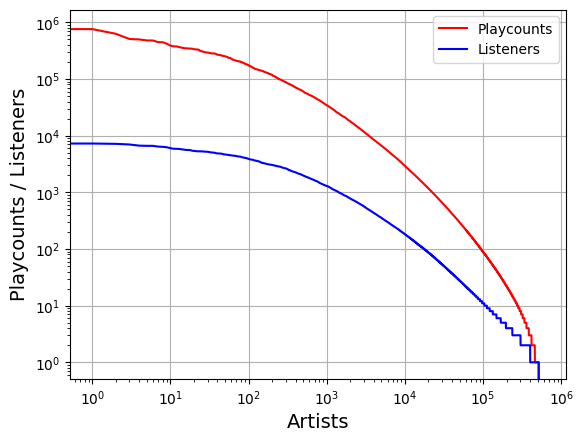

Avg_playcount =  372.13881848246865
Sdev_playcount =  5119.9155095116275
Avg_users =  18.795086268041942
Sdev_users =  123.57149244080021
Avg_MeanPC =  nan
Sdev_MeanPC =  nan
Avg_MedianPC =  nan
Sdev_MedianPC =  nan


In [ ]:

import numpy as np
import matplotlib.pyplot as plt


STATISTICS_OUTPUT_FILE_FEM = 'LFM-1b_stats_users.txt'         # output file for statistics (from LFM-1b_stats.py)

# Main program
if __name__ == '__main__':
    # Load figures from file
    data = np.loadtxt(STATISTICS_OUTPUT_FILE_FEM)

    handle_tpc, = plt.loglog(range(data[:,0].__len__()), sorted(data[:,0], reverse=True), 'r-')
    handle_uqa, = plt.loglog(range(data[:,1].__len__()), sorted(data[:,1], reverse=True), 'b-')
    plt.legend([handle_tpc, handle_uqa], ['Playcounts', 'Listeners'])
#    plt.title('Listener-based statistics', fontsize=18)
    plt.xlabel('Artists', fontsize=14)
    plt.ylabel('Playcounts / Listeners', fontsize=14)
    plt.grid(True)
    plt.savefig('LFM-1b_user_plot.eps', format='eps', dpi=1000)
    plt.show()

    # Determine additional statistics of the listening events distribution
    Avg_playcount = np.mean(data[:, 0])
    Sdev_playcount = np.std(data[:, 0])
    Avg_users = np.mean(data[:, 1])
    Sdev_users = np.std(data[:, 1])
    Avg_MeanPC = np.mean(data[:, 2])
    Sdev_MeanPC = np.std(data[:, 2])
    Avg_MedianPC = np.mean(data[:, 4])
    Sdev_MedianPC = np.std(data[:, 4])

    print("Avg_playcount = ", Avg_playcount)
    print("Sdev_playcount = ", Sdev_playcount)
    print("Avg_users = ", Avg_users)
    print("Sdev_users = ", Sdev_users)
    print("Avg_MeanPC = ", Avg_MeanPC)
    print("Sdev_MeanPC = ", Sdev_MeanPC)
    print("Avg_MedianPC = ", Avg_MedianPC)
    print("Sdev_MedianPC = ", Sdev_MedianPC)


Play counts (red plot) at x = 10^0, 10^3, and 10^5: [849954.0, 34440.0, 89.0]
Listeners (blue plot) at x = 10^0, 10^3, and 10^5: [7500.0, 1292.0, 11.0]


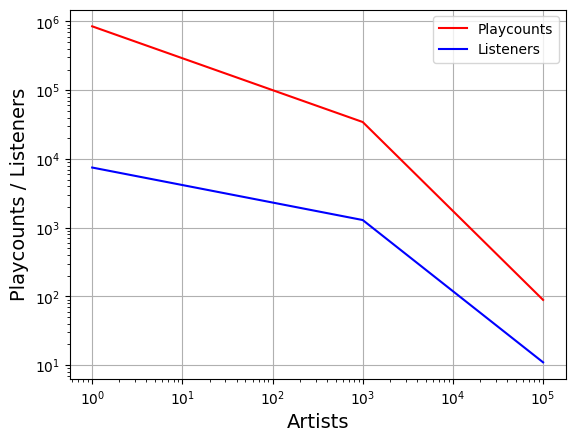

In [ ]:
STATISTICS_OUTPUT_FILE_FEM = 'LFM-1b_stats_users.txt'  # output file for statistics (from LFM-1b_stats.py)

# Main program
if __name__ == '__main__':
    # Load figures from file
    data = np.loadtxt(STATISTICS_OUTPUT_FILE_FEM)

    # Get sorted data
    sorted_tpc = sorted(data[:, 0], reverse=True)
    sorted_uqa = sorted(data[:, 1], reverse=True)

    # Get x-axis values at 10^0, 10^3, and 10^5
    x_values = [10 ** 0, 10 ** 3, 10 ** 5]

    # Get y-axis values at x = 10^0, 10^3, and 10^5
    y_values_tpc = [sorted_tpc[0], sorted_tpc[min(10**3, len(sorted_tpc)-1)], sorted_tpc[min(10**5, len(sorted_tpc)-1)]]
    y_values_uqa = [sorted_uqa[0], sorted_uqa[min(10**3, len(sorted_uqa)-1)], sorted_uqa[min(10**5, len(sorted_uqa)-1)]]

    print("Play counts (red plot) at x = 10^0, 10^3, and 10^5:", y_values_tpc)
    print("Listeners (blue plot) at x = 10^0, 10^3, and 10^5:", y_values_uqa)

    # Plot the data
    handle_tpc, = plt.loglog(x_values, y_values_tpc, 'r-')
    handle_uqa, = plt.loglog(x_values, y_values_uqa, 'b-')
    plt.legend([handle_tpc, handle_uqa], ['Playcounts', 'Listeners'])

    plt.xlabel('Artists', fontsize=14)
    plt.ylabel('Playcounts / Listeners', fontsize=14)
    plt.grid(True)
    plt.savefig('LFM-1b_user_plot.eps', format='eps', dpi=1000)
    plt.show()

Male Users - Distribution of Listening events by artists

In [ ]:
import numpy as np
import h5py
from scipy import sparse

UAM_MATLAB_FILE = 'LFM-1b_LEs.mat'
USER_DATA_FILE = 'output-4.txt'
STATISTICS_OUTPUT_FILE_MALE = 'LFM-1b_stats_users.txt'

def read_UAM(m_file, user_data_file):
    mf = h5py.File(m_file, 'r')
    user_ids = np.array(mf['idx_users']).astype(np.int64)[:55771]
    artist_ids = np.array(mf['idx_artists']).astype(np.int64)

    # Load UAM
    UAM = sparse.csr_matrix((mf['/LEs/']['data'][()],
                             mf['/LEs/']['ir'][()],
                             mf['/LEs/']['jc'][()])).transpose()

    # Read gender and filter only male information from user data file
    user_data = np.loadtxt(user_data_file, dtype=np.str_, delimiter='\t', skiprows=1)
    gender_ids = (user_data[:, 2] == 'm').astype(np.int64)

    # Filter users based on gender (male)
    female_user_ids = user_ids[gender_ids == 1][:55771]

    # Find the common users between the user data file and UAM
    common_users = np.intersect1d(user_ids, female_user_ids)

    # Get the indices of common users in the UAM
    user_indices = np.where(np.isin(user_ids, common_users))[0]
    artist_indices = np.where(np.isin(artist_ids, artist_ids))[0]
    UAM = UAM[user_indices][:, artist_indices]

    # user and artist indices to access UAM
    UAM_user_idx = UAM.indices
    UAM_artist_idx = UAM.indptr
    return UAM, UAM_user_idx, UAM_artist_idx, common_users, artist_ids


if __name__ == '__main__':
    # Read UAM
    UAM, UAM_user_idx, UAM_artist_idx, common_users, artist_ids = read_UAM(UAM_MATLAB_FILE, USER_DATA_FILE)
    print('Male Users: ', len(common_users))
    print('Artists: ', len(artist_ids))

    # Compute some basic statistics with respect to the number of listeners each artist has
    pc_sum = np.zeros((len(artist_ids)), dtype=np.int32)
    pc_unique_artist = np.zeros((len(artist_ids)), dtype=np.int32)
    pc_mean = np.zeros((len(artist_ids)), dtype=np.float32)
    pc_median = np.zeros((len(artist_ids)), dtype=np.float32)
    pc_std = np.zeros((len(artist_ids)), dtype=np.float32)

    for i in range(0, len(artist_ids)):  # Loop over all artists
        pc_i = UAM.getcol(i).toarray()  # Get the column corresponding to the artist
        idx_nz = np.nonzero(pc_i)
        pc_unique_artist[i] = len(idx_nz[0])  # Number of listeners for the artist
        pc_sum[i] = np.sum(pc_i[idx_nz])
        pc_mean[i] = np.mean(pc_i[idx_nz])
        pc_std[i] = np.std(pc_i[idx_nz])
        pc_median[i] = np.median(pc_i[idx_nz])
        print('Artist ' + str(i) + " Playcount: " + str(pc_sum[i]) +
              "   Listeners: " + str(pc_unique_artist[i]) +
              "   Mean PC/listener: " + str(pc_mean[i]) +
              "   Std. PC/listener: " + str(pc_std[i]) +
              "   Median PC/listener: " + str(pc_median[i]))

        # Store to file
    np.savetxt(STATISTICS_OUTPUT_FILE_MALE, np.column_stack((pc_sum, pc_unique_artist, pc_mean, pc_std, pc_median)), fmt="%.3f")



Streaming output truncated to the last 5000 lines.
Artist 580095 Playcount: 1   Listeners: 1   Mean PC/listener: 1.0   Std. PC/listener: 0.0   Median PC/listener: 1.0
Artist 580096 Playcount: 3   Listeners: 3   Mean PC/listener: 1.0   Std. PC/listener: 0.0   Median PC/listener: 1.0
Artist 580097 Playcount: 3   Listeners: 2   Mean PC/listener: 1.5   Std. PC/listener: 0.5   Median PC/listener: 1.5
Artist 580098 Playcount: 1120   Listeners: 118   Mean PC/listener: 9.491526   Std. PC/listener: 29.392363   Median PC/listener: 2.0
Artist 580099 Playcount: 2922   Listeners: 83   Mean PC/listener: 35.20482   Std. PC/listener: 66.757385   Median PC/listener: 9.0
Artist 580100 Playcount: 2   Listeners: 1   Mean PC/listener: 2.0   Std. PC/listener: 0.0   Median PC/listener: 2.0
Artist 580101 Playcount: 6   Listeners: 1   Mean PC/listener: 6.0   Std. PC/listener: 0.0   Median PC/listener: 6.0
Artist 580102 Playcount: 0   Listeners: 0   Mean PC/listener: nan   Std. PC/listener: nan   Median PC/list

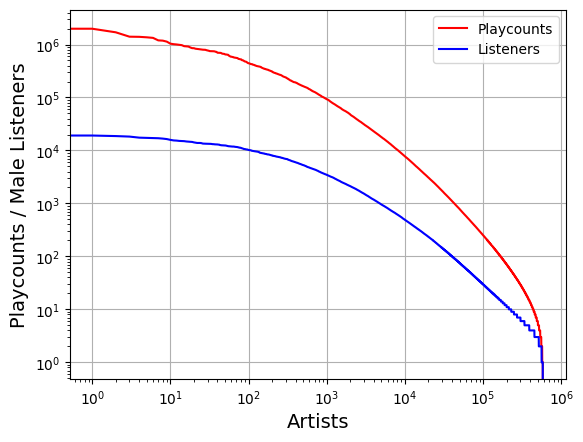

Avg_playcount =  998.178695767354
Sdev_playcount =  13586.907377672944
Avg_users =  50.83282543860399
Sdev_users =  329.16794461616814
Avg_MeanPC =  nan
Sdev_MeanPC =  nan
Avg_MedianPC =  nan
Sdev_MedianPC =  nan


In [ ]:

import numpy as np
import matplotlib.pyplot as plt


STATISTICS_OUTPUT_FILE_MALE = 'LFM-1b_stats_users.txt'         # output file for statistics (from LFM-1b_stats.py)

# Main program
if __name__ == '__main__':
    # Load figures from file
    data = np.loadtxt(STATISTICS_OUTPUT_FILE_FEM)

    handle_tpc, = plt.loglog(range(data[:,0].__len__()), sorted(data[:,0], reverse=True), 'r-')
    handle_uqa, = plt.loglog(range(data[:,1].__len__()), sorted(data[:,1], reverse=True), 'b-')
    plt.legend([handle_tpc, handle_uqa], ['Playcounts', 'Listeners'])
#    plt.title('Listener-based statistics', fontsize=18)
    plt.xlabel('Artists', fontsize=14)
    plt.ylabel('Playcounts / Male Listeners', fontsize=14)
    plt.grid(True)
    plt.savefig('LFM-1b_user_plot.eps', format='eps', dpi=1000)
    plt.show()

    # Determine additional statistics of the listening events distribution
    Avg_playcount = np.mean(data[:, 0])
    Sdev_playcount = np.std(data[:, 0])
    Avg_users = np.mean(data[:, 1])
    Sdev_users = np.std(data[:, 1])
    Avg_MeanPC = np.mean(data[:, 2])
    Sdev_MeanPC = np.std(data[:, 2])
    Avg_MedianPC = np.mean(data[:, 4])
    Sdev_MedianPC = np.std(data[:, 4])

    print("Avg_playcount = ", Avg_playcount)
    print("Sdev_playcount = ", Sdev_playcount)
    print("Avg_users = ", Avg_users)
    print("Sdev_users = ", Sdev_users)
    print("Avg_MeanPC = ", Avg_MeanPC)
    print("Sdev_MeanPC = ", Sdev_MeanPC)
    print("Avg_MedianPC = ", Avg_MedianPC)
    print("Sdev_MedianPC = ", Sdev_MedianPC)


Both Female & Male Users - Distribution of Listening events by artists

In [ ]:
import numpy as np
import h5py
from scipy import sparse

UAM_MATLAB_FILE = 'LFM-1b_LEs.mat'
USER_DATA_FILE = 'output-4.txt'
STATISTICS_OUTPUT_FILE_ALL = 'LFM-1b_stats_users.txt'

def read_UAM(m_file, user_data_file):
    mf = h5py.File(m_file, 'r')
    user_ids = np.array(mf['idx_users']).astype(np.int64)[:55771]
    artist_ids = np.array(mf['idx_artists']).astype(np.int64)

    # Load UAM
    UAM = sparse.csr_matrix((mf['/LEs/']['data'][()],
                             mf['/LEs/']['ir'][()],
                             mf['/LEs/']['jc'][()])).transpose()

    # Read gender and filter only male information from user data file
    user_data = np.loadtxt(user_data_file, dtype=np.str_, delimiter='\t', skiprows=1)
    gender_ids = np.isin(user_data[:, 2], ['f', 'm']).astype(np.int64)


    # Filter users based on gender (male)
    both_user_ids = user_ids[gender_ids == 1][:55771]

    # Find the common users between the user data file and UAM
    common_users = np.intersect1d(user_ids, both_user_ids)

    # Get the indices of common users in the UAM
    user_indices = np.where(np.isin(user_ids, common_users))[0]
    artist_indices = np.where(np.isin(artist_ids, artist_ids))[0]
    UAM = UAM[user_indices][:, artist_indices]

    # user and artist indices to access UAM
    UAM_user_idx = UAM.indices
    UAM_artist_idx = UAM.indptr
    return UAM, UAM_user_idx, UAM_artist_idx, common_users, artist_ids


if __name__ == '__main__':
    # Read UAM
    UAM, UAM_user_idx, UAM_artist_idx, common_users, artist_ids = read_UAM(UAM_MATLAB_FILE, USER_DATA_FILE)
    print('Male Users: ', len(common_users))
    print('Artists: ', len(artist_ids))

    # Compute some basic statistics with respect to the number of listeners each artist has
    pc_sum = np.zeros((len(artist_ids)), dtype=np.int32)
    pc_unique_artist = np.zeros((len(artist_ids)), dtype=np.int32)
    pc_mean = np.zeros((len(artist_ids)), dtype=np.float32)
    pc_median = np.zeros((len(artist_ids)), dtype=np.float32)
    pc_std = np.zeros((len(artist_ids)), dtype=np.float32)

    for i in range(0, len(artist_ids)):  # Loop over all artists
        pc_i = UAM.getcol(i).toarray()  # Get the column corresponding to the artist
        idx_nz = np.nonzero(pc_i)
        pc_unique_artist[i] = len(idx_nz[0])  # Number of listeners for the artist
        pc_sum[i] = np.sum(pc_i[idx_nz])
        pc_mean[i] = np.mean(pc_i[idx_nz])
        pc_std[i] = np.std(pc_i[idx_nz])
        pc_median[i] = np.median(pc_i[idx_nz])
        print('Artist ' + str(i) + " Playcount: " + str(pc_sum[i]) +
              "   Listeners: " + str(pc_unique_artist[i]) +
              "   Mean PC/listener: " + str(pc_mean[i]) +
              "   Std. PC/listener: " + str(pc_std[i]) +
              "   Median PC/listener: " + str(pc_median[i]))

        # Store to file
    np.savetxt(STATISTICS_OUTPUT_FILE_ALL, np.column_stack((pc_sum, pc_unique_artist, pc_mean, pc_std, pc_median)), fmt="%.3f")



Male Users:  55771
Artists:  585095
Artist 0 Playcount: 858470   Listeners: 9798   Mean PC/listener: 87.61686   Std. PC/listener: 405.94708   Median PC/listener: 9.0
Artist 1 Playcount: 60981   Listeners: 4043   Mean PC/listener: 15.083107   Std. PC/listener: 43.471176   Median PC/listener: 3.0
Artist 2 Playcount: 1073558   Listeners: 20910   Mean PC/listener: 51.341846   Std. PC/listener: 168.4705   Median PC/listener: 9.0
Artist 3 Playcount: 694632   Listeners: 7239   Mean PC/listener: 95.9569   Std. PC/listener: 307.24008   Median PC/listener: 12.0
Artist 4 Playcount: 29817   Listeners: 965   Mean PC/listener: 30.898445   Std. PC/listener: 98.563644   Median PC/listener: 4.0
Artist 5 Playcount: 15415   Listeners: 424   Mean PC/listener: 36.356133   Std. PC/listener: 88.285255   Median PC/listener: 7.0
Artist 6 Playcount: 874251   Listeners: 8521   Mean PC/listener: 102.59958   Std. PC/listener: 412.16516   Median PC/listener: 10.0
Artist 7 Playcount: 598517   Listeners: 5739   Mean 

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Streaming output truncated to the last 5000 lines.
Artist 580095 Playcount: 1   Listeners: 1   Mean PC/listener: 1.0   Std. PC/listener: 0.0   Median PC/listener: 1.0
Artist 580096 Playcount: 3   Listeners: 3   Mean PC/listener: 1.0   Std. PC/listener: 0.0   Median PC/listener: 1.0
Artist 580097 Playcount: 6   Listeners: 3   Mean PC/listener: 2.0   Std. PC/listener: 0.8164966   Median PC/listener: 2.0
Artist 580098 Playcount: 1337   Listeners: 158   Mean PC/listener: 8.462026   Std. PC/listener: 25.68397   Median PC/listener: 2.0
Artist 580099 Playcount: 4383   Listeners: 122   Mean PC/listener: 35.92623   Std. PC/listener: 78.40084   Median PC/listener: 8.0
Artist 580100 Playcount: 9   Listeners: 5   Mean PC/listener: 1.8   Std. PC/listener: 0.7483315   Median PC/listener: 2.0
Artist 580101 Playcount: 7   Listeners: 2   Mean PC/listener: 3.5   Std. PC/listener: 2.5   Median PC/listener: 3.5
Artist 580102 Playcount: 1   Listeners: 1   Mean PC/listener: 1.0   Std. PC/listener: 0.0   Med

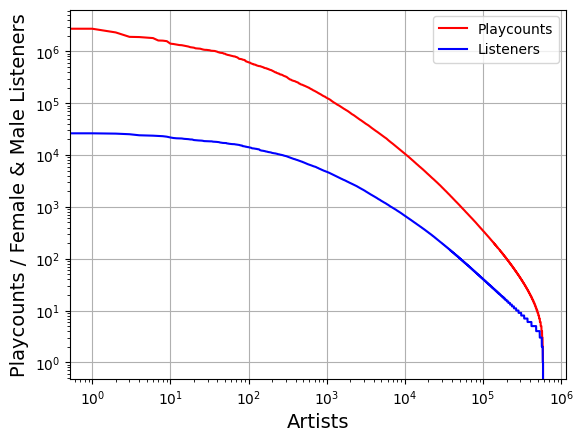

Avg_playcount =  1370.3175142498226
Sdev_playcount =  18667.948711761048
Avg_users =  69.62791170664593
Sdev_users =  452.61457555937324
Avg_MeanPC =  nan
Sdev_MeanPC =  nan
Avg_MedianPC =  nan
Sdev_MedianPC =  nan


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


STATISTICS_OUTPUT_FILE_ALL = 'LFM-1b_stats_users.txt'         # output file for statistics (from LFM-1b_stats.py)

# Main program
if __name__ == '__main__':
    # Load figures from file
    data = np.loadtxt(STATISTICS_OUTPUT_FILE_ALL)

    handle_tpc, = plt.loglog(range(data[:,0].__len__()), sorted(data[:,0], reverse=True), 'r-')
    handle_uqa, = plt.loglog(range(data[:,1].__len__()), sorted(data[:,1], reverse=True), 'b-')
    plt.legend([handle_tpc, handle_uqa], ['Playcounts', 'Listeners'])
#    plt.title('Listener-based statistics', fontsize=18)
    plt.xlabel('Artists', fontsize=14)
    plt.ylabel('Playcounts / Female & Male Listeners', fontsize=14)
    plt.grid(True)
    plt.savefig('LFM-1b_user_plot.eps', format='eps', dpi=1000)
    plt.show()

    # Determine additional statistics of the listening events distribution
    Avg_playcount = np.mean(data[:, 0])
    Sdev_playcount = np.std(data[:, 0])
    Avg_users = np.mean(data[:, 1])
    Sdev_users = np.std(data[:, 1])
    Avg_MeanPC = np.mean(data[:, 2])
    Sdev_MeanPC = np.std(data[:, 2])
    Avg_MedianPC = np.mean(data[:, 4])
    Sdev_MedianPC = np.std(data[:, 4])

    print("Avg_playcount = ", Avg_playcount)
    print("Sdev_playcount = ", Sdev_playcount)
    print("Avg_users = ", Avg_users)
    print("Sdev_users = ", Sdev_users)
    print("Avg_MeanPC = ", Avg_MeanPC)
    print("Sdev_MeanPC = ", Sdev_MeanPC)
    print("Avg_MedianPC = ", Avg_MedianPC)
    print("Sdev_MedianPC = ", Sdev_MedianPC)
